# House Price Predicion (EDA and Model Building)

In [1]:
import pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns

### Basic exploration of dataset

In [2]:
df=pd.read_csv('house_data.csv')
df=pd.DataFrame(df)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### Finding if dataset has any null values

In [5]:
df.isnull().value_counts()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view   condition  sqft_above  sqft_basement  yr_built  yr_renovated  street  city   statezip  country
False  False  False     False      False        False     False   False       False  False      False       False          False     False         False   False  False     False      4600
Name: count, dtype: int64

In [6]:
df['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

### Dropping Country column as all entries are from same country 

In [7]:
dff=df.iloc[:,1:14]
dff

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


### Finding Correlation between other features and Price

In [8]:
f=dff.corr()

<Axes: >

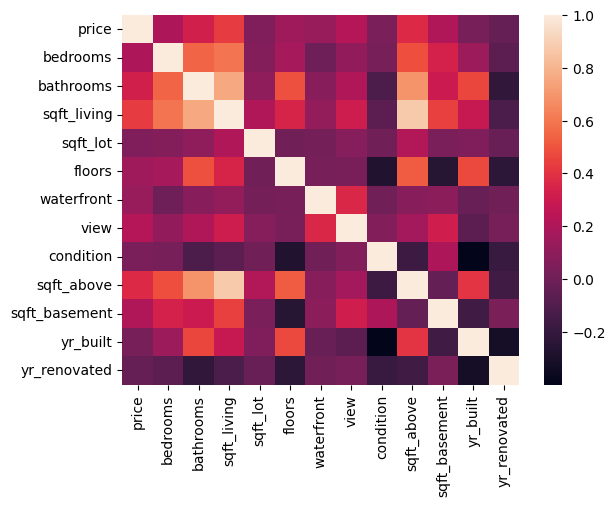

In [9]:
sns.heatmap(f)

### Analysing other columns using plot

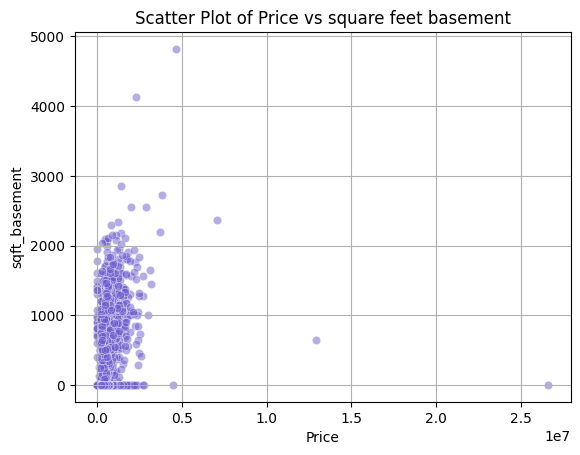

In [10]:
sns.scatterplot(x=df['price'], y=df['sqft_basement'], color='slateblue', alpha=0.5)
plt.title('Scatter Plot of Price vs square feet basement')
plt.xlabel('Price')
plt.ylabel('sqft_basement')
plt.grid(True)
plt.show()

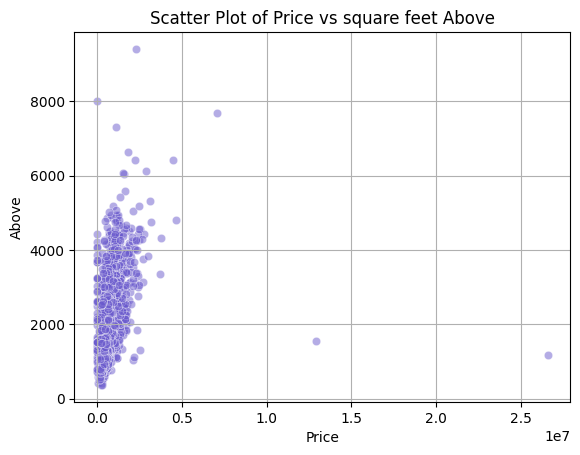

In [11]:
sns.scatterplot(x=df['price'], y=df['sqft_above'], color='slateblue', alpha=0.5)
plt.title('Scatter Plot of Price vs square feet Above')
plt.xlabel('Price')
plt.ylabel('Above')
plt.grid(True)
plt.show()

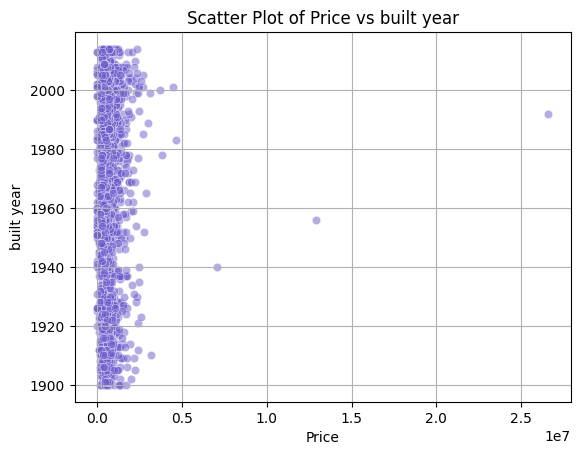

In [12]:
sns.scatterplot(x=df['price'], y=df['yr_built'], color='slateblue', alpha=0.5)
plt.title('Scatter Plot of Price vs built year')
plt.xlabel('Price')
plt.ylabel('built year')
plt.grid(True)
plt.show()

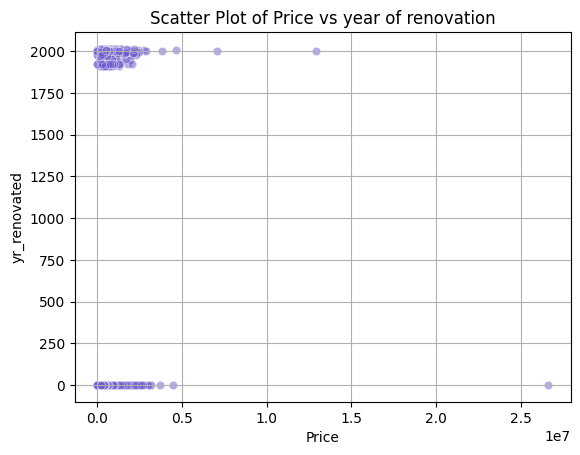

In [13]:
sns.scatterplot(x=df['price'], y=df['yr_renovated'], color='slateblue', alpha=0.5)
plt.title('Scatter Plot of Price vs year of renovation')
plt.xlabel('Price')
plt.ylabel('yr_renovated')
plt.grid(True)
plt.show()

### Dropping 'statezip','country','street','sqft_lot','condition','yr_built','yr_renovated','date' columns as they have low correlation with Price based on Heatmap, above plots and some of which are not relevant for current application

In [14]:
df.drop(columns=['statezip','country','street','sqft_lot','condition','yr_built','yr_renovated','date' ],inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city
0,313000.0,3.0,1.50,1340,1.5,0,0,1340,0,Shoreline
1,2384000.0,5.0,2.50,3650,2.0,0,4,3370,280,Seattle
2,342000.0,3.0,2.00,1930,1.0,0,0,1930,0,Kent
3,420000.0,3.0,2.25,2000,1.0,0,0,1000,1000,Bellevue
4,550000.0,4.0,2.50,1940,1.0,0,0,1140,800,Redmond


### Plot Showing number of houses per city and ranking in descending order

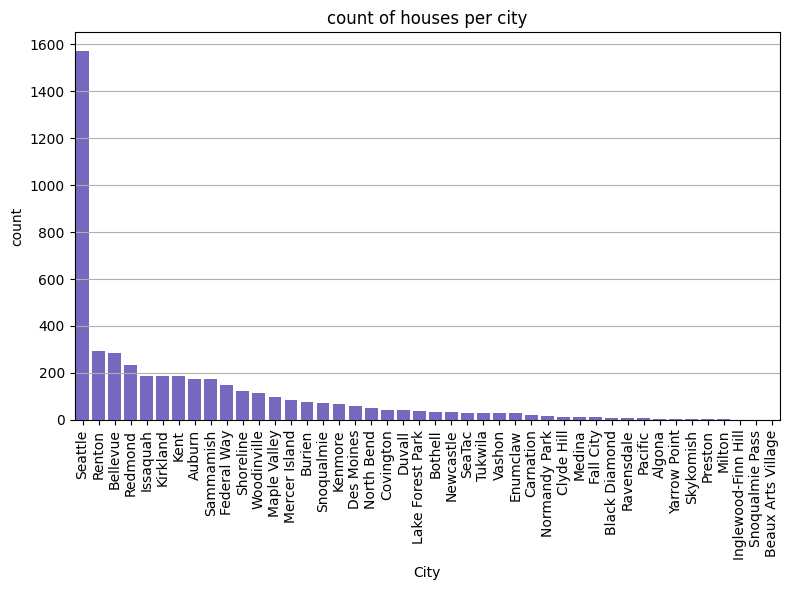

In [15]:
plt.figure(figsize=(8, 6))
s = df['city'].value_counts(ascending=False)
sns.countplot(x='city',data=df,order=s.index,color='slateblue')
plt.title('count of houses per city')
plt.xlabel('City')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Plot to show Which city have houses with highest prices

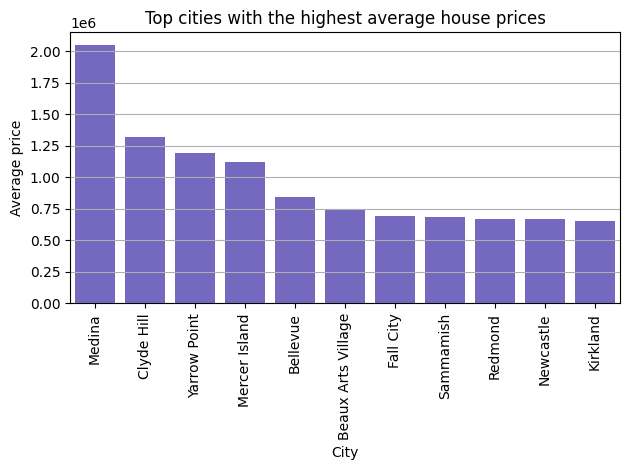

In [16]:
avg_p=df.groupby('city')['price'].mean().sort_values(ascending=False)
t10=avg_p.head(11)
sns.barplot(data=t10,color='slateblue')
plt.title('Top cities with the highest average house prices')
plt.xlabel('City')
plt.ylabel('Average price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Preprocessing city column Before model building

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df['city']=le.fit_transform(df['city'])
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city
0,313000.0,3.0,1.50,1340,1.5,0,0,1340,0,36
1,2384000.0,5.0,2.50,3650,2.0,0,4,3370,280,35
2,342000.0,3.0,2.00,1930,1.0,0,0,1930,0,18
3,420000.0,3.0,2.25,2000,1.0,0,0,1000,1000,3
4,550000.0,4.0,2.50,1940,1.0,0,0,1140,800,31


### Spliting Dataset into Independentt and Target Variables

In [19]:
xx=df.iloc[:,1:]
xx

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city
0,3.0,1.50,1340,1.5,0,0,1340,0,36
1,5.0,2.50,3650,2.0,0,4,3370,280,35
2,3.0,2.00,1930,1.0,0,0,1930,0,18
3,3.0,2.25,2000,1.0,0,0,1000,1000,3
4,4.0,2.50,1940,1.0,0,0,1140,800,31
...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,1.0,0,0,1510,0,35
4596,3.0,2.50,1460,2.0,0,0,1460,0,3
4597,3.0,2.50,3010,2.0,0,0,3010,0,32
4598,4.0,2.00,2090,1.0,0,0,1070,1020,35


In [20]:
y=df.iloc[:,0].values
y

array([ 313000.      , 2384000.      ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

### Scaling data before model building

In [21]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [22]:
x=ms.fit_transform(xx)


### Spliting data into Training and Testing sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=42)

### Here we have selected Linear Regression Model and Random Forest Regressor for model selection

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr=LinearRegression()
rf=RandomForestRegressor(n_estimators=100,random_state=42)

### Training Model

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

### Testing model

In [28]:
pred1=lr.predict(x_test)
pred2=rf.predict(x_test)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Getting Evaluation metrics for model performance

In [30]:
print(f"For Linear model:\n R_2 Score is: {r2_score(y_test, pred1)*10}\n Mean Squared Error is: {mean_squared_error(y_test,pred1)}\n RSME is: {np.sqrt(mean_squared_error(y_test,pred1))}\n Mean Absolute Error is:{mean_absolute_error(y_test,pred1)}")

For Linear model:
 R_2 Score is: 0.6759761829942346
 Mean Squared Error is: 590692589360.0961
 RSME is: 768565.2798299544
 Mean Absolute Error is:192257.32815181973


In [31]:
print(f"For Random Forest model:\n R_2 Score is: {r2_score(y_test, pred2)*10}\n Mean Squared Error is: {mean_squared_error(y_test,pred2)}\n RSME is: {np.sqrt(mean_squared_error(y_test,pred2))}\n Mean Absolute Error is :{mean_absolute_error(y_test,pred2)}")

For Random Forest model:
 R_2 Score is: 0.8051938946160375
 Mean Squared Error is: 582506430018.6906
 RSME is: 763221.0885573659
 Mean Absolute Error is :159375.2676694368


### As Random Forest Regressor have better performance than Linear Regression. We will select Random Forest Regressor, as it is a better fit

### Plot to show Difference between Actual values and Predicted values by both models

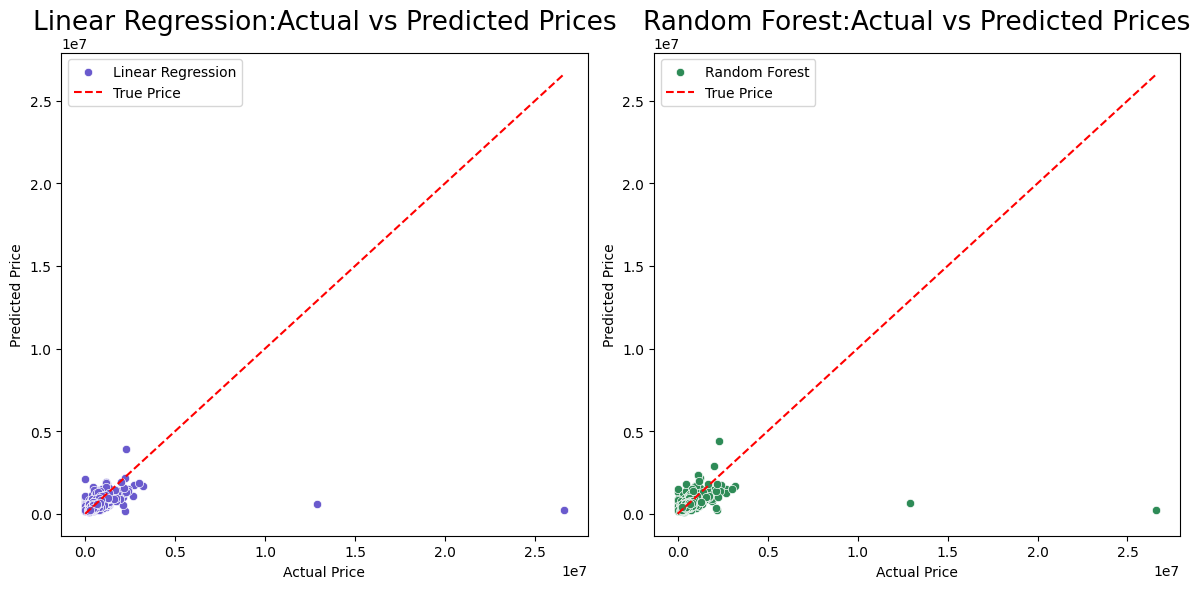

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test,y=pred1, color='slateblue', label='Linear Regression')
sns.lineplot(x=y_test,y=y_test, color='red', linestyle='--', label='True Price')
plt.title('Linear Regression:Actual vs Predicted Prices',fontsize=19)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test,y=pred2, color='seagreen', label='Random Forest')
sns.lineplot(x=y_test,y=y_test, color='red', linestyle='--', label='True Price')
plt.title('Random Forest:Actual vs Predicted Prices',fontsize=19)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.tight_layout(pad=5.0)

plt.tight_layout()
plt.show()

### Plot to Describe Featues which have most significance in model prediction, training and model Behaviour
### Plots ranks them based on features influence on prediction

In [33]:
if hasattr(rf, 'feature_importances_'):
  i= rf.feature_importances_
  featureName=xx.columns
  sorteidx=i.argsort()[::-1]
  sortedfeature= featureName[sorteidx]
  sortedi= i[sorteidx]
 

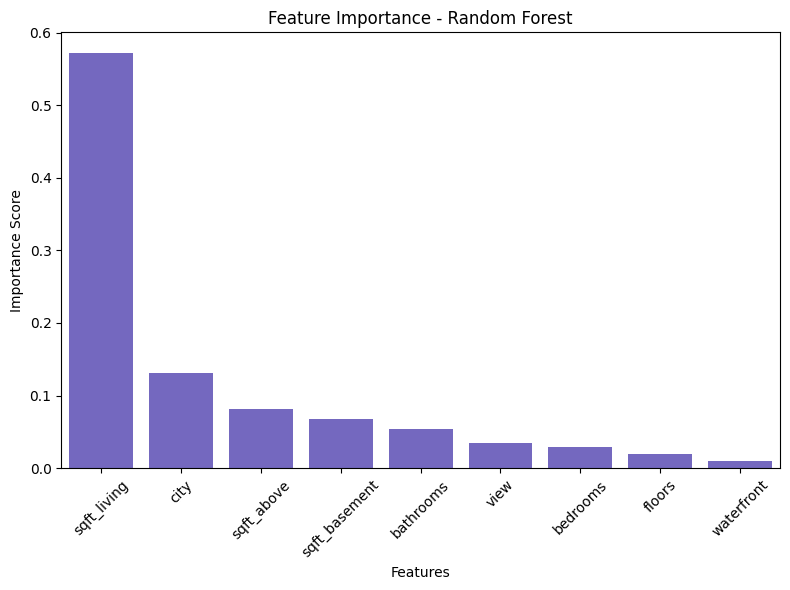

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sortedfeature,y=sortedi, color='slateblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### As we can see Sqft_Living has the most influence on model followed by city, sqft_above, sqft_basement, bathrooms, and so on.